In [20]:
import pandas as pd
from matplotlib import pyplot as plt

Reading the raw dataset.

In [21]:
df = pd.read_csv(open("../raw/parliementary_debates_2024.tsv"), sep="\t", encoding="utf-8")
df

,id,speaker,sex,text,text_en,label
0,gb00000,af4af2005beaffb71b70b0c4dd2b4c1b,M,Does my right hon. Friend accept that the prob...,Does my right hon. Friend accept that the prob...,1
1,gb00001,77f2408f71f881219e1125e79b5a1ada,M,It is clearly progress that net migration from...,It is clearly progress that net migration from...,1
2,gb00002,d99fc5be5cd4dfa671fb49ecd8043522,M,5. When she next plans to meet the independent...,5. When she next plans to meet the independent...,0
3,gb00003,234848ad13c121d6c1bb410e807d95a6,M,9. What assistance her Department offers to pe...,9. What assistance her Department offers to pe...,0
4,gb00004,77f443ccf2fc1a2c0d7efa4739377ed3,F,10. How many Syrian refugees have been resettl...,10. How many Syrian refugees have been resettl...,0
...,...,...,...,...,...,...
24234,gb24234,4213a691fd1ebd2721bb0b7de661ea7a,M,"My Lords, there is an instant when you are thi...","My Lords, there is an instant when you are thi...",1
24235,gb24235,4213a691fd1ebd2721bb0b7de661ea7a,M,"My Lords, my noble friend has just made a poin...","My Lords, my noble friend has just made a poin...",1
24236,gb24236,8fdbc105e4ba465d5851bd950f8c65db,F,"My Lords, I declare an interest as my husband ...","My Lords, I declare an interest as my husband ...",0
24237,gb24237,00706379643796d0a5071eeb4e203860,M,"My Lords, what a pleasure and privilege to fol...","My Lords, what a pleasure and privilege to fol...",1


Dropping useless columns.

In [22]:
df = df.drop(columns=["id", "speaker", "sex", "text_en"])

Renaming columns.

In [23]:
df = df.rename(columns={"text": "body", "label": "leaning"})

Categorizing the leaning column.

In [24]:
df["leaning"].unique()

array([1, 0])

In [25]:
df["leaning"] = df["leaning"].replace({0: "left", 1: "right"})
df["leaning"] = df["leaning"].astype("category")

Dropping rows with missing data.

In [26]:
df = df.dropna()

Printing duplicates.

In [27]:
df[df["body"].duplicated(keep=False)]

,body,leaning


Inspecting body length.

In [28]:
df["body_length"] = df["body"].str.len()
df["body_word_count"] = df["body"].str.split().str.len()
df = df.sort_values(by="body_length")
df.head()

,body,leaning,body_length,body_word_count
7732,The clear impression given by today’s announce...,left,496,84
7740,"My Lords, many of those who are self-employed ...",left,496,87
21102,Does the Chancellor agree with the <PARTY> par...,left,497,83
3724,"My Lords, this is an absolute abdication of re...",left,497,78
3312,17. Does my right hon. Friend agree that the f...,right,497,90


In [29]:
df["body_length"].mean()

np.float64(2539.4363628862575)

The leaning distribution.

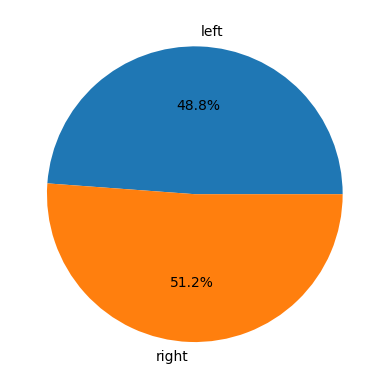

In [30]:
df.groupby("leaning", observed=True).size().plot.pie(autopct="%1.1f%%");

The distribution of body length sums per leaning.

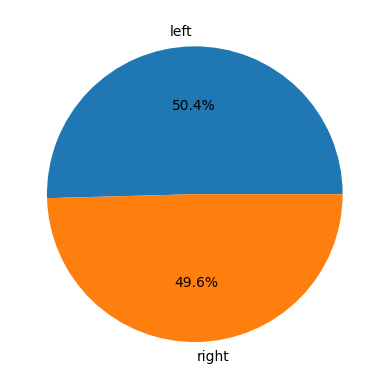

In [31]:
df.groupby("leaning", observed=True)["body_length"].sum().plot.pie(autopct="%1.1f%%", ylabel="");

Body length distribution by leaning.

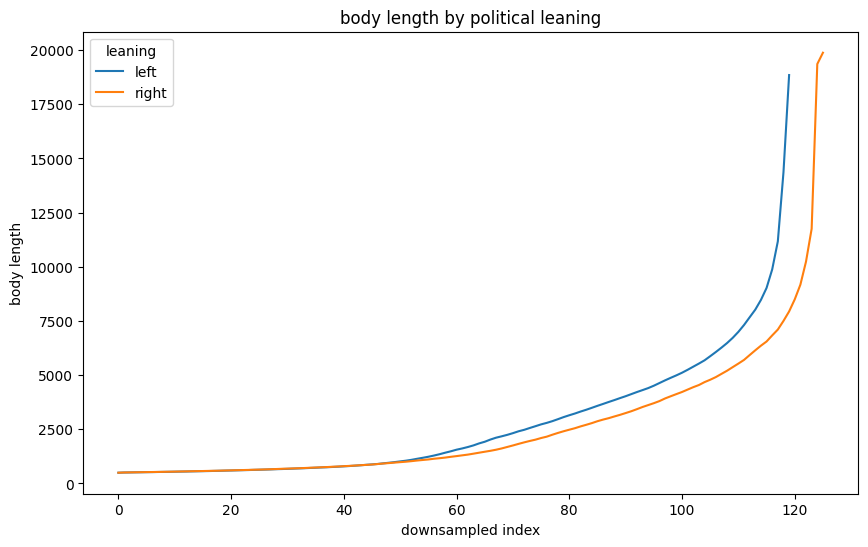

In [32]:
plt.figure(figsize=(10, 6))

for leaning in df["leaning"].unique():
    df_leaning = df[df["leaning"] == leaning]
    downsampled = pd.concat(
        # Ensuring to include the last (longest) item.
        [df_leaning["body_length"].iloc[::100], df_leaning["body_length"].tail(1)]
    ).drop_duplicates().reset_index(drop=True)
    plt.plot(downsampled, label=leaning)

plt.xlabel("downsampled index")
plt.ylabel("body length")
plt.title("body length by political leaning")
plt.legend(title="leaning")
plt.show()

In [33]:
df.to_parquet("../preprocessed/parliament_speeches_2024.parquet")